# How images represented

 - Image repres. in computer consist height and width, without colors signle image can be represented as a matrix, which is height X width. Thus when we have several images a batch representation is given by 3-d tensor which given by $(Batch size X height X width)$
 
 - We store colors as RGB which correspond to red, green and blue. We can create different colors using RGB thus a certain color can be represented as how much red, green and blue. Thus a single image with color can be represented as $height X width X depth(color\ dimension)$ and a batch of images can be represented as 4-d tensor $(Batch size X height X width X depth)$, where depth is always 3 since we are using RGB to represent colors.
 
 - Considering images without colors, FFNN does not take 3-d tensors as inputs thus we flatten it out and make 2-d tensor. That is single image will have row vector represent. given by $(1,height\cdot width)$

# FFNN with MNIST(no colors)

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # scale them to between 0-1 by dividing max(X)
print("x_train.shape:", x_train.shape)# 3-d tensor with dims (instances, height, width) with 28x28=784 pixels

x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # this can be done with np.reshape
  tf.keras.layers.Dense(128, activation='relu'), # non-linearity
  tf.keras.layers.Dropout(0.2), # regularization
  tf.keras.layers.Dense(10, activation='softmax') # see below for softmax
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # see below for sparse_cat_crossentrop.
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2971 - accuracy: 0.9132 - val_loss: 0.1359 - val_accuracy: 0.9590
Epoch 2/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1439 - accuracy: 0.9579 - val_loss: 0.0949 - val_accuracy: 0.9705
Epoch 3/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1074 - accuracy: 0.9674 - val_loss: 0.0876 - val_accuracy: 0.9715
Epoch 4/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0879 - accuracy: 0.9730 - val_loss: 0.0846 - val_accuracy: 0.9741
Epoch 5/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0744 - accuracy: 0.9767 - val_loss: 0.0728 - val_accuracy: 0.9779
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0654 - accuracy: 0.9790 - val_loss: 0.0704 - val_accuracy: 0.9788
Epoch 7/20
60000/60000 [==============================] 

## Output activation and Loss function

***Output Activation:***

Softmax is a activation function which maps the layer output to prob. range 0-1. The difference to sigmoid is that softmax has property that output vector sums up to 1. So for instance if we are doing multi-categorical classification where each instance only belongs to 1 class we use softmax. On the other hand if each instance can belong to several classes then we go with the sigmoid.

***Softmax:***
$$\sigma(\textbf{z})_i = \frac{e^{z_i}}{\sum_j^k e^{z_j}}$$
***Sigmoid:***
$$\sigma(z_i) = \frac{e^{z_i}}{1 + e^{z_i}}$$

***Loss Function:***

When we have multi-categorical output we use categorical cross entropy over binary cross entropy for obvious reasons(google it). We derive this loss function from the negative log likelihood of categorical distribution.

***PMF of categorical distr.:***
$$P(X = y_k) = \prod^K_i \mu_i^{\textbf{1}_{i=y_k}}$$

***Negative log likelihood.:***
$$-L = \sum^N_i \sum_k^K \textbf{1}_{y_i=k}log(\mu_k)$$

Note that when we in the case of each instance only belongs to 1 class, we have bunch of multiplication with 0 which are unnecessary computations thus instead we can locate the position of positive class from each instance and take the sum of those instances when we are calculation likelihood, this is called sparse categorical cross entropy. Also note that we cannot use this in the case of each instance may belong to several classes. We are forced to use binary cross entropy element wise for each label then sum the individual losses. 

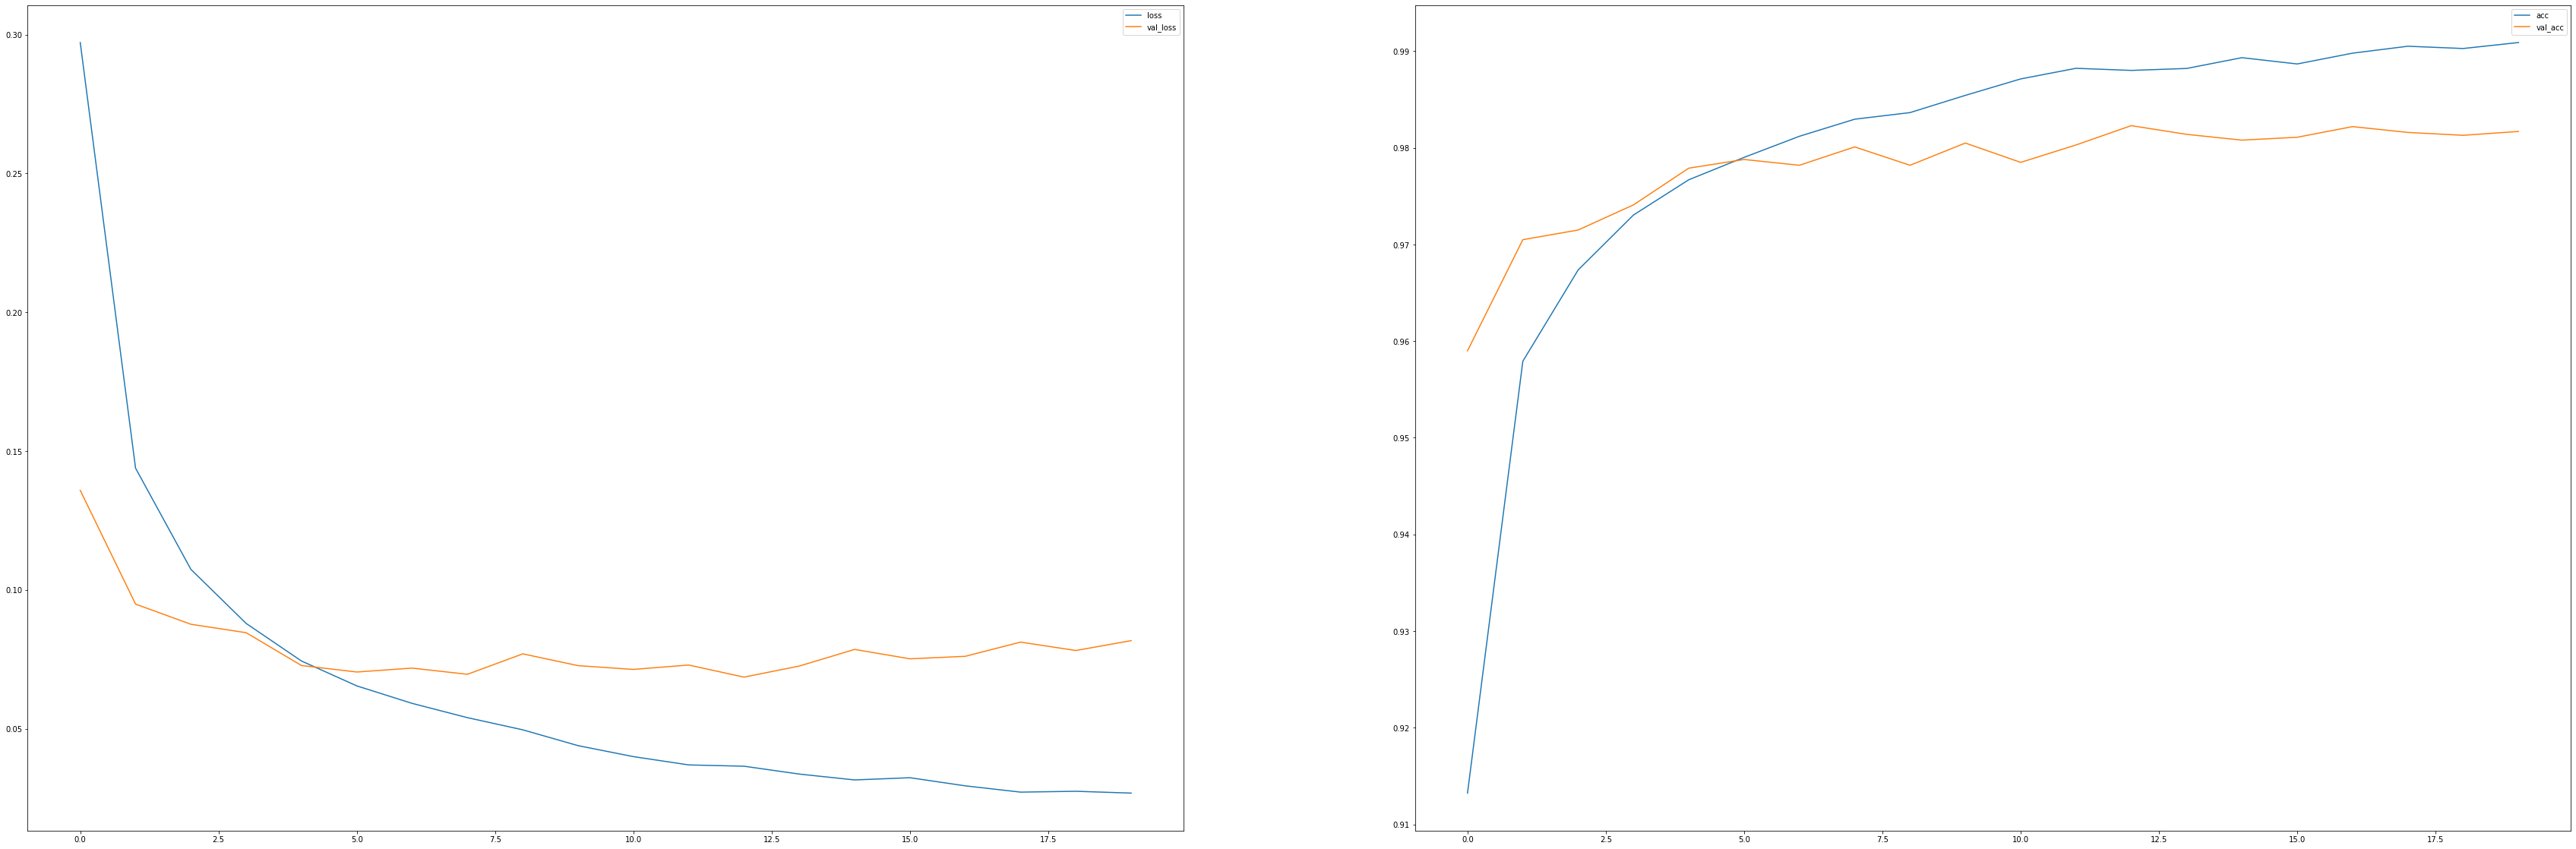

In [6]:
# Plot loss per iteration - Usual stuff
import matplotlib.pyplot as plt
plt.figure(figsize=(60,20))
plt.subplot(1,2,1)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# Plot accuracy per iteration
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
model.evaluate(x_test, y_test) # evaulate without predicting

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0817 - accuracy: 0.9817


[0.08172981641612533, 0.9817]

In [9]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_conf_matrix(cm, classes, 
                     normalize=False, 
                     title='Confusion matrix', 
                     cmap=plt.cm.Blues):
    if normalize==True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.figure(figsize=(20,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

Confusion matrix, without normalization
[[ 970    0    1    1    0    0    4    1    3    0]
 [   0 1127    3    1    0    1    1    1    1    0]
 [   0    1 1020    2    0    0    2    4    3    0]
 [   0    0    1  992    0    9    0    5    3    0]
 [   0    0    7    0  963    0    3    2    2    5]
 [   2    1    0    4    0  877    3    0    4    1]
 [   5    3    0    1    4    4  937    0    4    0]
 [   2    2    9    5    0    1    0 1004    2    3]
 [   2    0    3    5    4    4    0    2  951    3]
 [   2    2    0    8    4    1    1    9    6  976]]


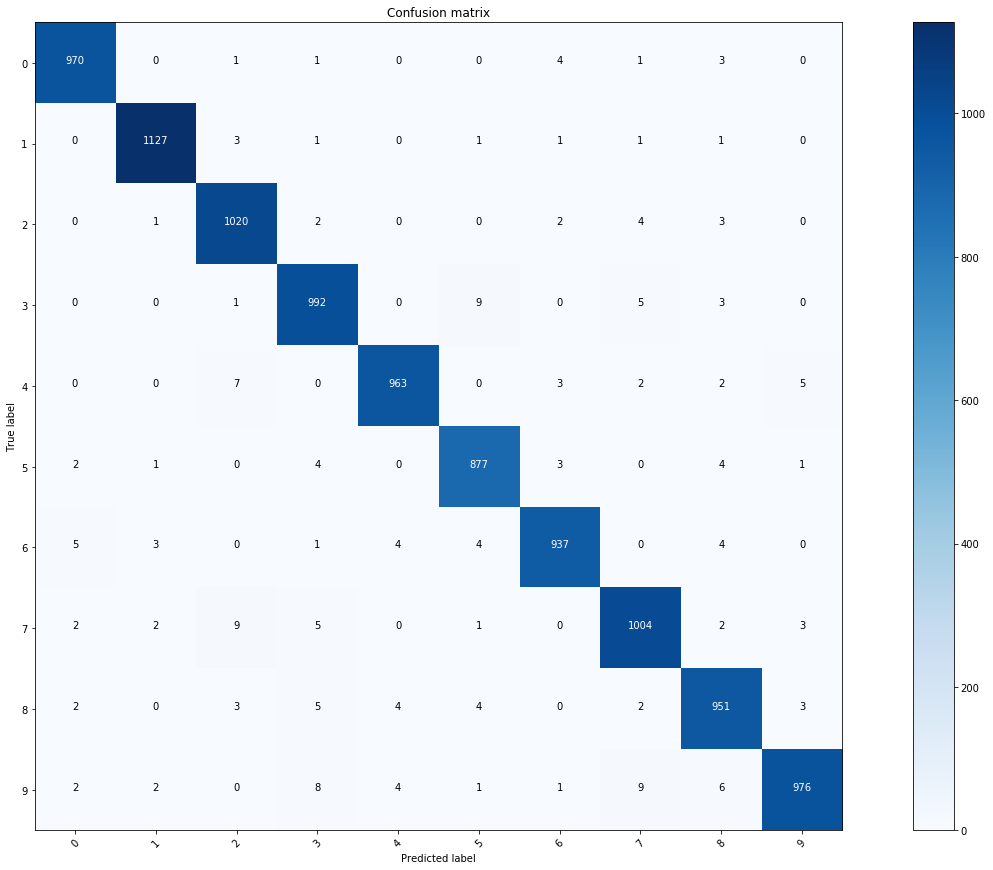

In [11]:
y_pred = model.predict(x_test).argmax(axis=1) # outputs probs, converting to classes
cm = confusion_matrix(y_test, y_pred)
plot_conf_matrix(cm, list(range(10)))

***Visualizing a wrongly classified digit***

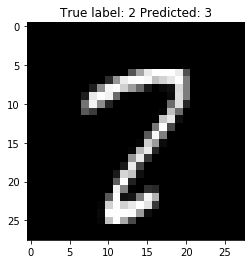

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0] # to return as array
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));

# Convolutional Nets

 - Convolution is a type of operation that is conducted on input image and the filter(kernel). Operation is represented by the symbol star(*) which not correspond to multipclation. Conv. in its most basic form is given by:
 $$Input \ Image * \ Kernel = Output \ Image$$
 
 - There 2 specific example of Conv. operation
 
     - Blurring:
     
     Which blurrs the input image with given input image and kernel
     
     - Edge Detection:
     
     As input we have original version of the image and as output we get a image with white lines over the edges of the image and black in the remaining parts, meaning output is the image with highlighted edges.
     
 - Considering these we can just think Conv. operation as a feature transformation on the input image
 
 - What makes the difference between these 2 methods is the kernel. If we use a gaussian filter on image we get blurr image. On the other hand if we use edge detection filter we get output with highlighted edges.

## Conv. Operation

 - Conv. operation boils down to dumb matrix multip. and summing elements of the output matrix of dumb matrix multip. Consider the following example with a single gray-scale image represented as 4 by 4 matrix and a filter represented as 2 by 2 matrix.
 
 $$\begin{bmatrix}
0 & 10 & 10 & 0\\
20 & 30 & 30 & 20\\
10 & 20 & 20 & 10\\
0 & 5 & 5 & 0
\end{bmatrix} * 
\begin{bmatrix}
1 & 0\\
0 & 2
\end{bmatrix} = \begin{bmatrix}
60 & 70 & 50\\
60 & 70 & 50\\
20 & 30 & 20\\
\end{bmatrix}$$


 - Filter slides through rows and columns of image at each pass we do element wise multip. and sum the output of element wise multip. Note that output location corresponds to where we placed the filter along the original image.
 
 - Note that if we have a input image given as $(N\ x\ N)$ matrix and a filter given $(K\ x\ K)$ matrix, Conv. operation outputs a $(N-K+1\ x\ N-K+1)$ matrix.
 
 - More generally, if the input image has $N$ rows and filter has $K$ rows, output will have $N-K+1$ rows, same argument follows for the columns. In the example we used a square matrix for both image and kernel, this is not necessarly case for images but as convention filters always has square representation. We can convert images to square for modelling purposes.
 
 - In general Conv. operation is given by:
 
 $$Z_{i,j} = \sum_{i^{\prime}=0}^{K-1} \sum_{j^{\prime}=0}^{K-1} A_{i + i^{\prime}, j+j^{\prime}}\cdot F_{i^{\prime}, j^{\prime}}$$
 
 - This is deep learning version of Conv. operation, original one slightly different, it does not matter though since we use gradient descent to learn kernel values. Also note that this is Conv2D not 1-3D
 
 - Note that output is smaller than input image, if we want output to be same size as input, we can use zero padding. Also filter causes information loss, meaning when we dont use padding we do not capture all non-zero outputs. These properties of Conv. operation leads to 3 different type of Conv. operation which differs in padding process.
 
     - Valid: 
     No zero-padding, results in lenght of $N-K+1$
     
     - Same: 
     Zero padding in a way which output has same lenght of input, results in $N$ lenght
     
     - Full: 
     Zero padding in a way that we capture all of the non-zero outputs, results in lenght $N+K-1$

## Conv. intuition

 - Consider dot product between 2 column vectors:
 $$a\cdot b = a^{T}b = \sum^N_i a_i b_i$$
 
 - Now this is quite similar to Conv operation.
 
 - Why dot product
 
     - Another represent. of dot product is given by:
     $$a \cdot b = |a||b|\underbrace{cos\theta_{ab}}_{\text{Cos of Angle between 2 vectors}}$$
     This is known as cosine similarity, similarity between 2 vectors. If the angle between 2 vectors is 0 meaning they parellel then Cos is 1, which is the max value Cos can take. On the other hand if the angle is 90, meaning they are orthogonal Cos is 0 which corresponds to no similarity. This is where pearson correlation is coming from, thus we can think dot product as a correlation measure.
     
  - Thus we can think Conv. operation as similarity measure and the filter as pattern finder. We optimize filter matrix with gradient descent, filter slides along to original image and tries to find a pattern that is related to output of the model. Thus filter is updated in such a way, outputs high values in absolute terms for the parts of the image that is explanatory of the output of the model and outputs low values in absolute terms for the parts of the image that is not. In the end filter is sliding pattern finder.
     

 - Alternativly we can represent Conv. operation as a matrix multip.
 
 - Consider a Conv1D example, where:
 $$[a_1, a_2, a_3, a_4] = Input \quad [w_1, w_2] = Filter$$
 - Thus Conv1D is given by:
 $$Input * Filter = [w_1a_1 + w_2a_2, w_1a_2 + w_2a_3, w_1a_3 + w_2a_4]$$
 
 - As a matrix multip., we have:
 $$\begin{bmatrix}
w_1a_1 + w_2a_2\\
w_1a_2 + w_2a_3\\
w_1a_3 + w_2a_4\\
\end{bmatrix} = 
\begin{bmatrix}
w_1 & w_2 & 0 & 0\\
0 & w_1 & w_2 & 0\\
0 & 0 & w_1 & w_2\\
\end{bmatrix}
\begin{bmatrix}
a_1\\
a_2\\
a_3\\
a_4
\end{bmatrix}$$

 - Notice this correspond to same operation as Dense layer do but with a twist which is in Conv layer weights are shared rather than each element represent a single weight.

## Convolution function

In [14]:
def conv(input_image, kernel): # This is valid mode
    output_rows = input_image.shape[0] - kernel.shape[0] + 1
    output_cols = input_image.shape[1] - kernel.shape[1] + 1
    output = np.zeros((output_rows, output_cols))
    for i in range(output_rows):
        for j in range(output_cols):
            for ii in range(kernel.shape[0]):
                for jj in range(kernel.shape[1]):
                    output[i, j] += input_image[i+ii, j+jj]*kernel[ii,jj]
    return output
        

In [15]:
image_inp = np.array([[0,10,10,0], [20,30,30,20], [10,20,20,10], [0,5,5,0]])
kernel = np.array([[1,0], [0,2]])
print("",image_inp.shape, "\n", 
     kernel.shape)

 (4, 4) 
 (2, 2)


In [16]:
conv(image_inp, kernel) # same output as above example

array([[60., 70., 50.],
       [60., 70., 50.],
       [20., 30., 20.]])

## Conv on colored images

 - When we have color dimension Conv operator becomes:
 $$Z_{i,j} = \sum_{c=1}^3 \sum_{i^{\prime}=1}^{K} \sum_{j^{\prime}=1}^{K} A_{i + i^{\prime}, j+j^{\prime},c}\cdot F_{i^{\prime}, j^{\prime},c}$$
 
 - Note that even input is 3D, output of the Conv operator is still 2D, for instance if input is $H\ x\ W\ x\ 3$ and the kernel is $K\ x\ K\ x\ 3$ output will be $(H-K+1)x(W-K+1)$
 
 - Neural Nets in its core works because of its uniformity, next layer takes the prev. layer output as input thus prev. layer input should be same dimension as its output.
 
 - To solve this we use multiple filters. Consider an image with shape $H\ x\ W\ x\ 3$ if we use 3 filters with all shape $K\ x\ K\ x\ 3$ each will conv. operation will have a output of shape $(H-K+1)x(W-K+1)$ then we stack these 2D matrices in the 3rd dimension and we end up with a output shape $(H-K+1)x(W-K+1)x3$. Also note that 3rd dimension of output depends on the how many filters we use
 
 - But we dont wanna chain several conv operations then stack them together due to the time it takes, instead we can define kernel as 4D and vectorize the operation. Consider the following:
 $$\underbrace{Input = A}_{H\ x\ W\ x\ C_1} \quad \underbrace{Kernel = w}_{C_1\ x\ K\ x\ K\ x\ C_2} \quad \underbrace{Output = B}_{H\ x\ W\ x\ C_2}$$
 
 - Where $C_1$ corresponds to number of color channels and $C_2$ corresponds to number of filters, following this Conv. operation is given by:
 $$B_{i,j,c} = \sum^K_{i^{\prime}=1} \sum^K_{j^{\prime} = 1} \sum^{C_1}_{c^{\prime}=1} A_{i + i^{\prime}, j+j^{\prime}, c^{\prime}}\cdot w_{c^{\prime}, i^{\prime}, j^{\prime}, c}$$
 
 - Note that $C_2$ does not represent color anymore, they are just arbitarary features obtained from the original image, these are called feature maps, where each filter output correspond to single map.
 
 - In the end conv layer represented as:
 $$\sigma(w * A + b)$$
 
 - Where $b$ is the bias term with the size $C_2$ vector, normally adding a vector of $C_2$ to 3D tensor is not really valid but anywayz we are happy as long as it works. Sigma refers to some arbitarary activation function.
 
 - For comparison reasons, dense layer is given by:
 $$\sigma(w^T A + b)$$
 
 
 

## CNN Architecture

 - Typical CNN is given by:
 $$\underbrace{Conv \to Pool \to Conv \to Pool}_{First \ Stage} \to \underbrace{Dense \to Dense}_{Second \ Stage}$$
 
 - Recall we defined Conv as a feature transformer operator, we can think above arch as, first stage is feature extraction/transformation/engineering/whatever and the second stage is mini FFNN - nonlinear classifier/regression.
 
 - Pooling layer is a downsampling layer for instance if we $100\ x\ 100$ input and a pool layer of pooling size 2, pooling layer reduces the size of input to $50\ x\ 50$.
 
 - Recall Conv. is similar to cosine similarity, which outputs high values in the locations filter found some pattern, thus max pooling down samples data by only retaining parts that filter found a important pattern.
 
 - Pooling layers have some flexibilty, it can look at the boxes with different rows or columns, also sliding window(strides) can be changed allowing boxes to overlap with each. Overlapping boxes or different col or row number for box sizes is not really common.
 
 - At each layer Conv. layer focuses on particular features. For instance in first layer it focusses on edges and in the second layer, it focusses on nose, eye whatever. This is because of the pooling layers. At each layer input shrinks and filter can focus on larger portion of the input assuming filter size stays same. Thus when the input is large filter focusses on smaller features as the input shrinks it starts to focus on larger features such as nose,eye. 
 
 - We can think pooling layer as zooming into image as we zoom in more filter starts to realize nose,eye,mouth. But when the input is large since filters goes through small portion of input it focusses on smaller features.
 
 - Also note that when we shrink the image we lose information but at the same time if we increase the filters at each layer, we are increasing the number of different features. This can be considered as, we are losing the information where in the image feature found but we are increasing the number of different features found. Generally it is not important where the feature found as long as it is found.
 
 - Some conventions to follow with CNNS:
     
     - Small filter size(K) relative to image
     
     - Conv to Pooling structure(alternativly we can use stride > 1 in conv layers.)
     
     - Increase the feature maps in each layer(number of filters)
     
  - Note that we need to flatten the image before feeding it to dense layer.
  
  - Alternative to Flatten, we can use GlobalMaxPooling which takes max over height and width dimension over each feature map. For instance if single image has shape $(H\ x\ W\ x\ c)$, output of the globalmaxpooling has shape of $(1\ x\ 1\ x\ c)$ regardless of $H$ and $W$.

### Summary of usual Conv arch.

***Step 1:***

Choose the Conv Arch you want to follow

2 choices:

 - $Conv \to Pool \to Conv \to ..$
 
 - $Srided\ Conv \to Strided \ Conv \to ..$
 
***Step 2:***

Choose the formatting of Convs output for dense layers

2 Choices:

 - Flatten()
 
 - GlobalMaxPooling2D()
 
***Step 3:***

Non-linear predictor

 - $Dense \to Dense \to ..$


## Conv Examples

### Gray scale images

In [17]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model # Functional API of tf 2.0

In [18]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist # Harder task compared to MNIST

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Scale the data between 0-1
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [19]:
# the data is only 2D, CNN2D expects 3D data even its called 2D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [20]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


***Conv2D Arguments***

 - First Argument - # of Filters(how many feature maps)
 
 - Second Argument - Dimensions of the filter
 
 - Stride - Step size of the sliding window of filter, here we use stride of 2 thus we can avoid pooling layer
 
 - Padding - Discussed above

In [21]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656

In [22]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.5249 - accuracy: 0.8038 - val_loss: 0.4162 - val_accuracy: 0.8471
Epoch 2/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3614 - accuracy: 0.8634 - val_loss: 0.3467 - val_accuracy: 0.8740
Epoch 3/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.3136 - accuracy: 0.8806 - val_loss: 0.3117 - val_accuracy: 0.8862
Epoch 4/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2789 - accuracy: 0.8952 - val_loss: 0.3160 - val_accuracy: 0.8821
Epoch 5/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.2543 - accuracy: 0.9046 - val_loss: 0.2912 - val_accuracy: 0.8967
Epoch 6/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2327 - accuracy: 0.9117 - val_loss: 0.2881 - val_accuracy: 0.8964
Epoch 7/10
60000/60000 [====================

In [23]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.3070 - accuracy: 0.9016


[0.3069707871437073, 0.9016]

In [24]:
# Alternativly with MaxPooling and GlobalMaxPooling 
# Note that it is much slower due to using pooling over strides
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=1, activation='relu')(i)
x = MaxPooling2D(2)(x)
x = Conv2D(64, (3, 3), strides=1, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(128, (3, 3), strides=1, activation='relu')(x)
x = GlobalMaxPooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
global_max_pooling2d (Global (None, 128)               0   

In [25]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 618us/sample - loss: 0.5721 - accuracy: 0.7868 - val_loss: 0.3908 - val_accuracy: 0.8549
Epoch 2/10
60000/60000 [==============================] - 35s 577us/sample - loss: 0.3621 - accuracy: 0.8662 - val_loss: 0.3490 - val_accuracy: 0.8694
Epoch 3/10
60000/60000 [==============================] - 32s 529us/sample - loss: 0.3115 - accuracy: 0.8835 - val_loss: 0.2957 - val_accuracy: 0.8908
Epoch 4/10
60000/60000 [==============================] - 30s 492us/sample - loss: 0.2807 - accuracy: 0.8956 - val_loss: 0.2874 - val_accuracy: 0.8931
Epoch 5/10
60000/60000 [==============================] - 34s 561us/sample - loss: 0.2578 - accuracy: 0.9043 - val_loss: 0.2752 - val_accuracy: 0.9006
Epoch 6/10
60000/60000 [==============================] - 26s 433us/sample - loss: 0.2394 - accuracy: 0.9105 - val_loss: 0.2617 - val_accuracy: 0.9033
Epoch 7/10
60000/60000 [====================

In [26]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 114us/sample - loss: 0.2529 - accuracy: 0.9128


[0.25291942566633224, 0.9128]

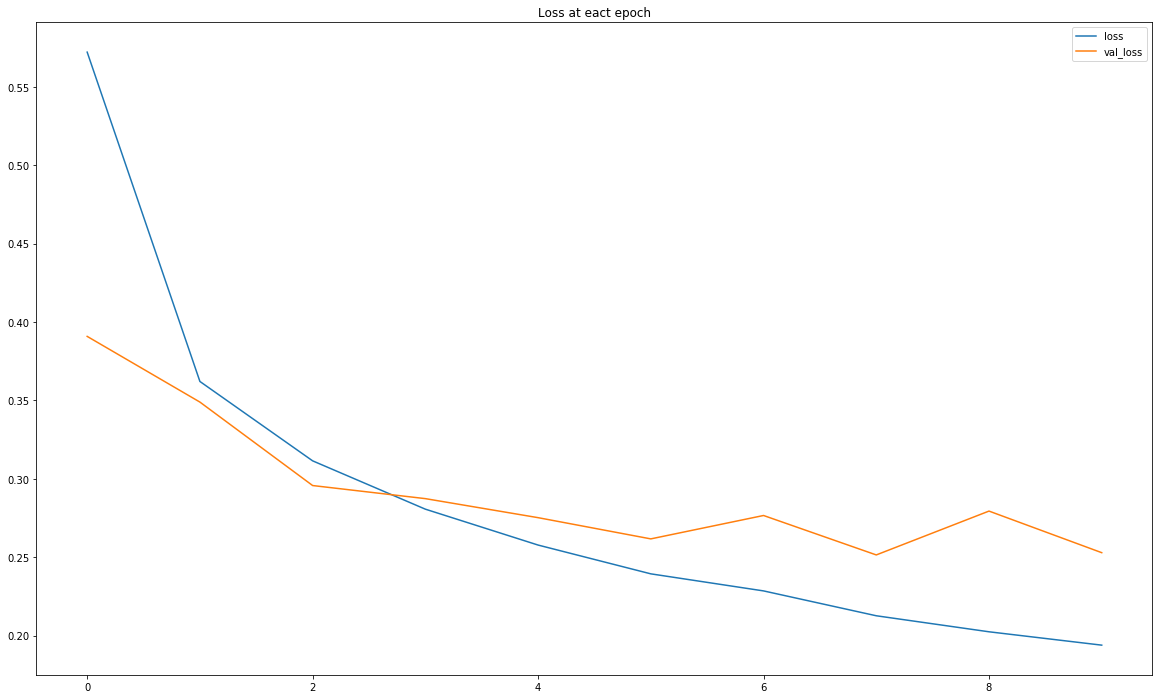

In [27]:
# Plot loss per iteration - Note that it can be trained more but will start overfitting soon
plt.figure(figsize=(20,12))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss at eact epoch")
plt.legend()

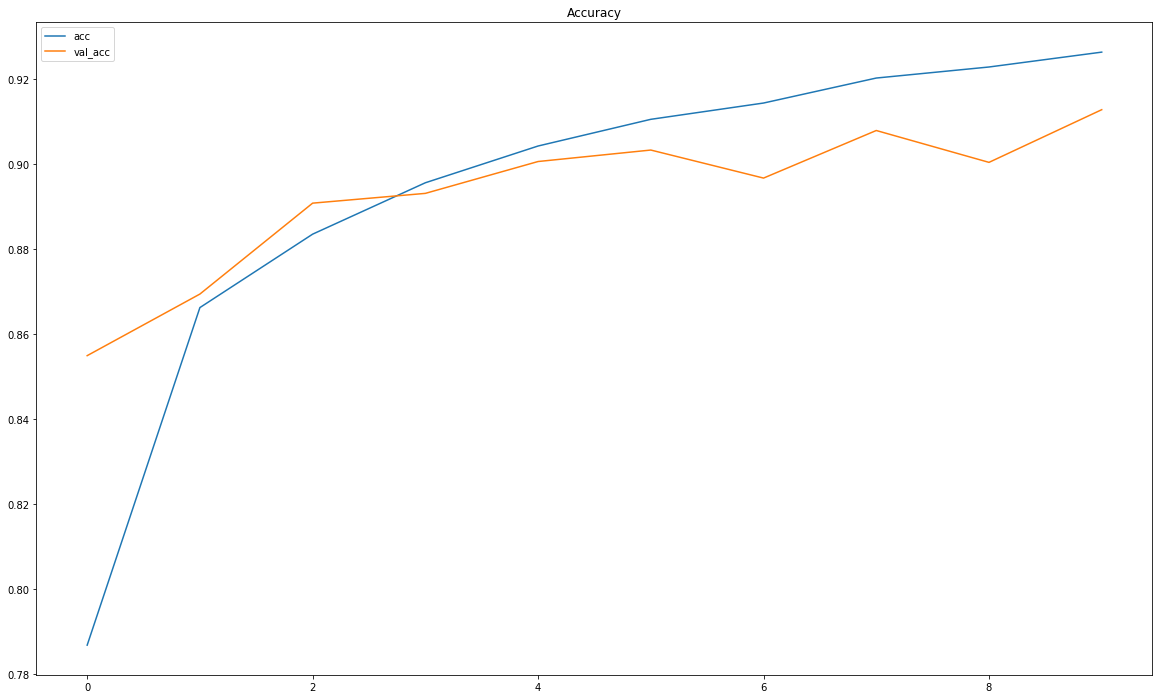

In [28]:
# Plot accuracy per iteration - same picture
plt.figure(figsize=(20,12))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.legend()

In [29]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")



Confusion matrix, without normalization
[[864   1  13  18   1   1  92   0  10   0]
 [  1 981   0  13   3   0   1   0   1   0]
 [ 15   1 870  13  42   0  58   0   1   0]
 [ 18   3   4 942  12   0  18   0   3   0]
 [  2   1  29  39 891   0  35   0   3   0]
 [  0   0   0   0   0 985   0  10   0   5]
 [131   2  60  26  90   0 676   0  15   0]
 [  0   0   0   0   0  10   0 970   1  19]
 [  4   0   0   2   4   1   4   2 983   0]
 [  1   0   0   0   0   3   0  30   0 966]]


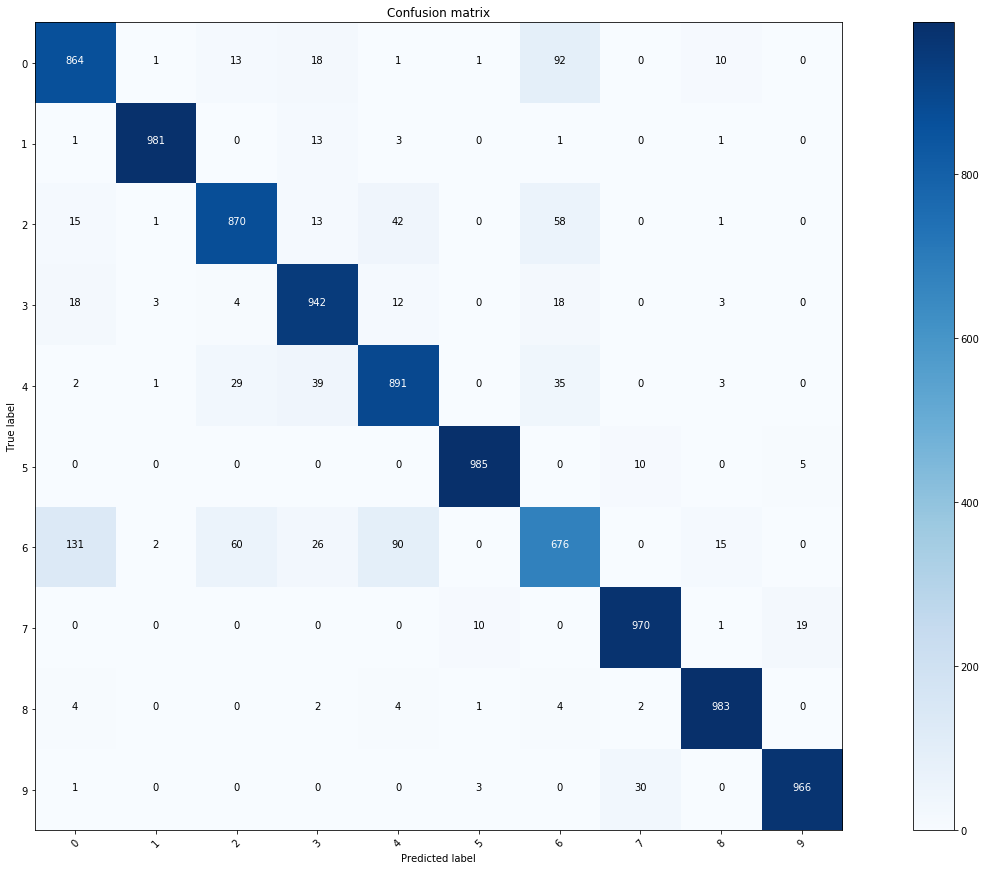

In [30]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_conf_matrix(cm, list(range(10)))

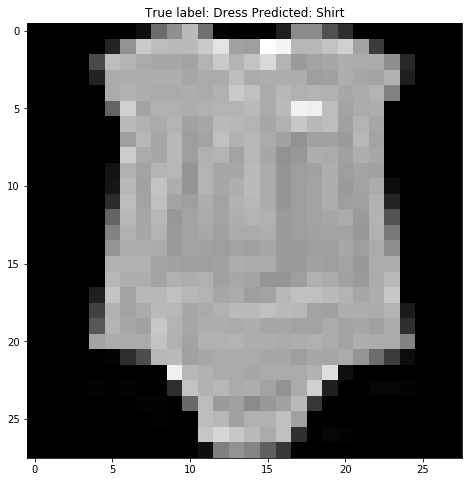

In [31]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(8,8))
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

### Colored Image

 - In the Arch of network nothing changes only difference is in the input layer instead of arbitarary 4th dimension as 1 we will have RGB color dimension which is 3
 
 - This makes a difference in the first Conv layer filter, that is instead of having a shape of $(1x3x3x32)$, we will have $(3x3x3x32)$

In [32]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [33]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [34]:
# Same
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1180

In [36]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)
model.evaluate(x_test, y_test)

Train on 50000 samples, validate on 10000 samples
10000/10000 [==============================] - 1s 109us/sample - loss: 0.9898 - accuracy: 0.6557


[0.9897648496627808, 0.6557]

In [37]:
# label mapping
labels = '''airplane
automobile
bird
fifi
deer
dog
frog
horse
ship
truck'''.split()

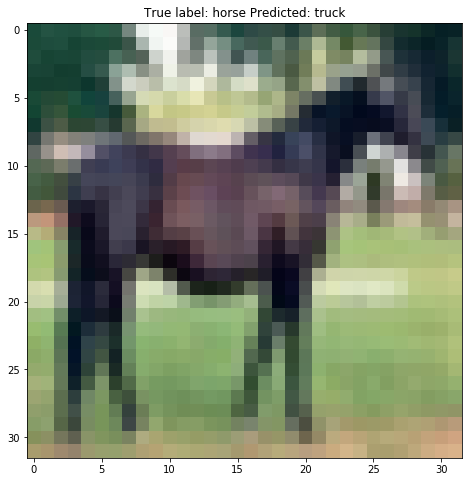

In [38]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(8,8))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

## Data Augmentation

 - Refers to process of generating new images from existing ones by shifting rotating the existing images.
 
 - We can do this through keras generator/iterator

## Batch Normalization

 - Just like we normalize data before feeding into Neural Net, batch norm. layer takes the output output of a layer and normalizes that output by batch mean and standard deviation. Aditionally it denormalize data with some parameters that is learned through gradient descent. Thus network also learns mean and standard deviation of the batches through gradient descent.
 
 - This also acts as regularization, since every batch will have different mean and standard deviation thus it add noise to the batches and prevents overfitting.
 
 - Batch normalization generally gives improvment on Conv networks not so much FFNN and RNNs.
 
 - Batch norm layer operation is given by:
 $$z = \frac{x - \mu_B}{\sigma_B}$$
 $$y = \gamma z + \beta$$
 
 
 - Where gamma and beta learned through gradient descent.

## Small Scale VGG without Data Aug.

In [39]:
# Model
from tensorflow.keras.layers import BatchNormalization
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # VGG chains Conv before pooling
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x) # Commented out not much difference, also does not make much sense
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x) # flatten or max pooling
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        1849

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 283s 6ms/sample - loss: 1.2866 - accuracy: 0.5557 - val_loss: 1.1700 - val_accuracy: 0.5943
Epoch 2/5
50000/50000 [==============================] - 597s 12ms/sample - loss: 0.8444 - accuracy: 0.7070 - val_loss: 0.8387 - val_accuracy: 0.7069
Epoch 3/5
50000/50000 [==============================] - 628s 13ms/sample - loss: 0.6902 - accuracy: 0.7624 - val_loss: 0.8019 - val_accuracy: 0.7344
Epoch 4/5
50000/50000 [==============================] - 358s 7ms/sample - loss: 0.5844 - accuracy: 0.7965 - val_loss: 0.7494 - val_accuracy: 0.7521
Epoch 5/5
50000/50000 [==============================] - 265s 5ms/sample - loss: 0.5001 - accuracy: 0.8289 - val_loss: 0.6562 - val_accuracy: 0.7812


In [42]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 9s 856us/sample - loss: 0.6562 - accuracy: 0.7812


[0.6561595206737518, 0.7812]

## Small Scale VGG with Data Aug.

In [43]:
# Model

i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # VGG chains Conv before pooling
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x) # Commented out not much difference, also does not make much sense
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x) # flatten or max pooling
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(
    x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=6)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/6
1562/1562 [==============================] - 292s 187ms/step - loss: 1.4389 - accuracy: 0.4992 - val_loss: 1.2224 - val_accuracy: 0.5886
Epoch 2/6
1562/1562 [==============================] - 293s 188ms/step - loss: 0.9999 - accuracy: 0.6511 - val_loss: 0.9671 - val_accuracy: 0.6769
Epoch 3/6
1562/1562 [==============================] - 292s 187ms/step - loss: 0.8539 - accuracy: 0.7042 - val_loss: 0.7679 - val_accuracy: 0.7378
Epoch 4/6
1562/1562 [==============================] - 297s 190ms/step - loss: 0.7581 - accuracy: 0.7410 - val_loss: 0.7149 - val_accuracy: 0.7634
Epoch 5/6
1562/1562 [==============================] - 300s 192ms/step - loss: 0.6840 - accuracy: 0.7657 - val_loss: 0.7738 - val_accuracy: 0.7371
Epoch 6/6
1562/1562 [==============================] - 307s 196ms/step - loss: 0.6307 - accuracy: 0.7858 - val_loss:

In [45]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 8s 848us/sample - loss: 0.6271 - accuracy: 0.7948


[0.6270864507198334, 0.7948]

## Small Scale VGG with and without Data Aug.

 - Here we first fit the model without data aug. then we cont. training with data aug.

In [46]:
# Model

i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # VGG chains Conv before pooling
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x) # Commented out not much difference, also does not make much sense
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x) # flatten or max pooling
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# Fit without data aug
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 298s 6ms/sample - loss: 1.2757 - accuracy: 0.5577 - val_loss: 0.9817 - val_accuracy: 0.6527
Epoch 2/3
50000/50000 [==============================] - 288s 6ms/sample - loss: 0.8471 - accuracy: 0.7082 - val_loss: 0.8678 - val_accuracy: 0.7045
Epoch 3/3
50000/50000 [==============================] - 307s 6ms/sample - loss: 0.6957 - accuracy: 0.7616 - val_loss: 0.7347 - val_accuracy: 0.7477


In [48]:
# Fit with data aug
# There is a bug in TF 2.1 does not inherit weights complt. 
# Normally better results with tf 2.0
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=3)

model.evaluate(x_test, y_test)

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/3
1562/1562 [==============================] - 291s 187ms/step - loss: 0.7639 - accuracy: 0.7390 - val_loss: 1.2965 - val_accuracy: 0.6323
Epoch 2/3
1562/1562 [==============================] - 282s 180ms/step - loss: 0.6925 - accuracy: 0.7652 - val_loss: 0.7636 - val_accuracy: 0.7516
Epoch 3/3
10000/10000 [==============================] - 8s 765us/sample - loss: 0.6240 - accuracy: 0.7903


[0.6240099627017975, 0.7903]